In [ ]:
## Mounting Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
  



Mounted at /content/drive


In [ ]:
## Collecting data from the drive
df = pd.read_csv('/content/drive/My Drive/Neural-CARS/london_20k.csv') 

In [ ]:
df.shape

(20000, 13)

In [ ]:
df.head(2)

,photo_id,owner,gender,occupation,title,description,tags,faves,lat,lon,u_city,u_country,taken
0,12056545693,78191777@N00,1.0,Producer/DJ,près,<i>Let us draw near with a true heart in full ...,"clapham, london, england, ukgarage, dubstep, e...",0,51.465163,-0.129085,30307,USA,2014-01-20 15:19:44
1,12453639663,41087279@N00,1.0,Accountant,DSC_4241 Chyna Whyne from Jamaica Live at Char...,Chyna Whyne from Jamaica Live at Charlie Wrigh...,"chyna, whyne, from, jamaica, live, charlie, wr...",1,51.527672,-0.083648,London,England,2014-02-09 23:05:35


In [ ]:
# data=df[['gender','occupation','description','tags','faves','u_city']]

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=f46699d67445aeb230f5f6902a356c9fe95c545fdab9412bc9be488bfedfc1fa
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from apyori import apriori  
records = []  
for i in range(0, len(df)):  
    records.append([str(df.values[i,j]) for j in range(0, 13)])


In [ ]:
records[:3]

[['12056545693',
  '78191777@N00',
  '1.0',
  'Producer/DJ',
  'près',
  '<i>Let us draw near with a true heart in full assurance of faith, having our hearts sprinkled from an evil conscience, and our bodies washed with pure water.</i>  <b>Hebrews 10:22  King James Version</b>   <a href="https://role.bandcamp.com/album/pr-s" rel="noreferrer nofollow">role.bandcamp.com/album/pr-s</a>',
  'clapham, london, england, ukgarage, dubstep, experimentalelectronic, pregailsignore, spareparts, idm, abstract, neomedieval, meditative, praisethelord, psalm, prophétique, poétique, spagettiwestern, cowpoke, neopsychedelia, experimentalpop, westernswing, dusty, hosannadansleplushaut, jesus, theway, thetruth, thelife, experimentaldubstep, ballad, glitchhop, domirican, moombahton, reggaeton, jazzlatino, carnivale, ultra, miamibass, prijsdeheer, romans, knowledge, gooddoctrine, straightforward, postitalo, italopop, osannaalfigliodidavide, electro, experimental, lofihiphop, frenchhouse, berlinschool, lofi,

In [ ]:
# data.info()

In [ ]:
association_rules = apriori(records, min_support=0.05, min_confidence=0.6, min_lift=3.50, min_length=10)  
association_results = list(association_rules)
print(len(association_results)) 

125


In [ ]:
import pickle
MB=association_results
with open('/content/drive/My Drive/Neural-CARS/Rules.txt', 'wb') as fp:
    pickle.dump(MB, fp)

In [ ]:
## Mounting Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=6fec412b1c1b84b8624521d92395b55d6a5d259ce882721c758d911980674a6d
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import pickle
with open ('/content/drive/My Drive/Neural-CARS/Rules.txt', 'rb') as fp:
    itemlist = pickle.load(fp)

In [ ]:
MB = itemlist
listRules = [list(MB[i][0]) for i in range(0,len(MB))]
len(listRules)

125

In [ ]:
liscon=[]
for i in range(0,len(MB)):
    liscon.append(MB[i][1])
new_df=pd.DataFrame({'Rules':listRules,'Support_Ratio':liscon})
new_df.head(11)

,Rules,Support_Ratio
0,"[154266841@N04, London]",0.06200
1,"[154266841@N04, Photographer]",0.06200
2,"[154266841@N04, UK]",0.06200
3,"[Accountant, 41087279@N00]",0.06320
4,"[41087279@N00, England]",0.06320
5,"[London, 41087279@N00]",0.06320
6,"[47121377@N00, England]",0.05645
7,"[47121377@N00, Nr Greenwich, London]",0.05645
8,"[47121377@N00, Professional Manager]",0.05645
9,"[Accountant, England]",0.06320


In [ ]:
for item in MB:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 154266841@N04 -> London
Support: 0.062
Confidence: 1.0
Lift: 3.7778617302606725
Rule: 154266841@N04 -> Photographer
Support: 0.062
Confidence: 1.0
Lift: 15.037593984962406
Rule: 154266841@N04 -> UK
Support: 0.062
Confidence: 1.0
Lift: 6.501950585175553
Rule: Accountant -> 41087279@N00
Support: 0.0632
Confidence: 1.0
Lift: 15.822784810126581
Rule: 41087279@N00 -> England
Support: 0.0632
Confidence: 1.0
Lift: 5.431830526887561
Rule: London -> 41087279@N00
Support: 0.0632
Confidence: 1.0
Lift: 3.7778617302606725
Rule: 47121377@N00 -> England
Support: 0.05645
Confidence: 1.0
Lift: 5.431830526887561
Rule: 47121377@N00 -> Nr Greenwich, London
Support: 0.05645
Confidence: 1.0
Lift: 17.71479185119575
Rule: 47121377@N00 -> Professional Manager
Support: 0.05645
Confidence: 1.0
Lift: 17.71479185119575
Rule: Accountant -> England
Support: 0.0632
Confidence: 1.0
Lift: 5.431830526887561
Rule: London -> Accountant
Support: 0.0632
Confidence: 1.0
Lift: 3.7778617302606725
Rule: Nr Greenwich, Lond

In [ ]:
s=set()
import numpy as np
for i in new_df.iloc[np.arange(len(new_df)),0]:
    for j in i:
        s.add(j)
s


{'0',
 '1.0',
 '154266841@N04',
 '41087279@N00',
 '47121377@N00',
 'Accountant',
 'England',
 'London',
 'Nr Greenwich, London',
 'Photographer',
 'Professional Manager',
 'UK',
 'nan'}

In [ ]:
D=dict()
for j in s:
    D[j]=[rows['Support_Ratio'] for i,rows in new_df.iterrows() if(j in rows['Rules'])]
type(D)

dict

In [ ]:
!pip install plotly==3.10.0

     |████████████████████████████████| 41.5 MB 72 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 3.10.0 which is incompatible.


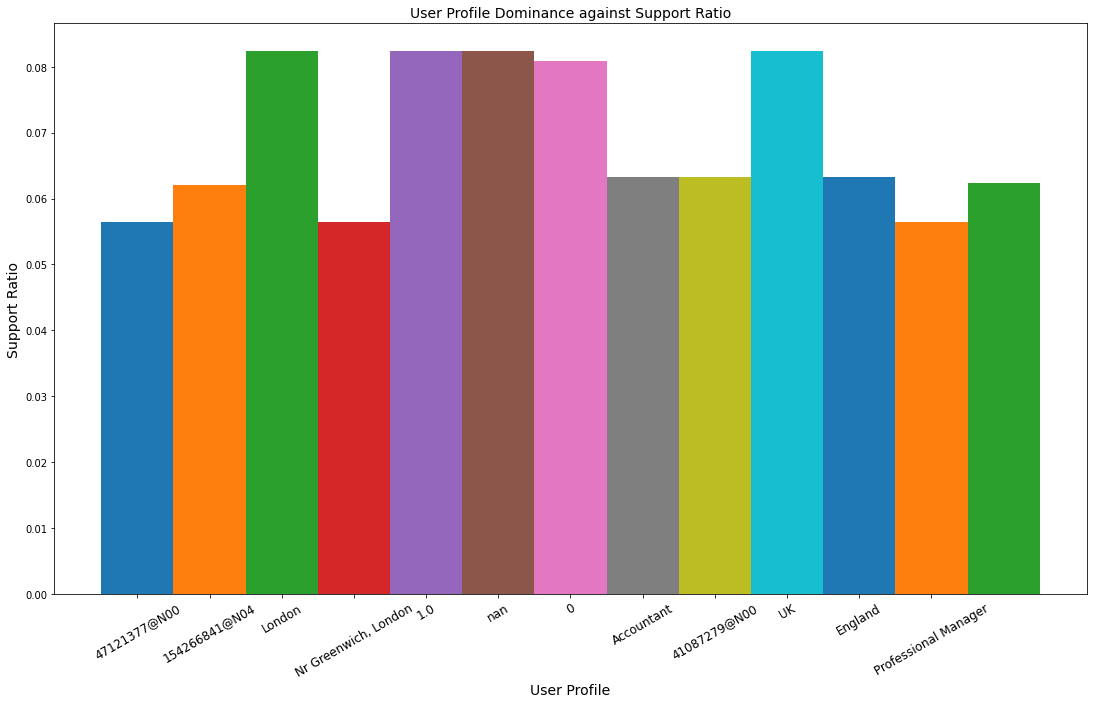

In [ ]:
import plotly.plotly as py
import plotly.tools as tls

from matplotlib import pylab
import matplotlib.pyplot as plt
names = list(D.keys())
values = list(D.values())
width = 1 
for i in range(len(D)):
    
    pylab.bar(i,values[i],width,tick_label=names[i])
#     plt.bar(1,values[1],tick_label=names[1])
#     plt.bar(2,values[2],tick_label=names[2])
    plt.xticks(range(0,i),names,fontsize=12, rotation=30)
#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylabel('Support Ratio',fontsize=14)
plt.xlabel('User Profile',fontsize=14)
plt.title('User Profile Dominance against Support Ratio',fontsize=14)
plt.savefig('association-1.png')
plt.show()

In [ ]:
L=[]
# for i in range(0,len(MB)):
#     L.append(MB[2][2][0][2])
for i in range(0,len(MB)):
    L.append(MB[i][2][0][2])
d=pd.DataFrame({'Rules':listRules,'Confidence':L})
d.head(11)

,Rules,Confidence
0,"[154266841@N04, London]",1.0
1,"[154266841@N04, Photographer]",1.0
2,"[154266841@N04, UK]",1.0
3,"[Accountant, 41087279@N00]",1.0
4,"[41087279@N00, England]",1.0
5,"[London, 41087279@N00]",1.0
6,"[47121377@N00, England]",1.0
7,"[47121377@N00, Nr Greenwich, London]",1.0
8,"[47121377@N00, Professional Manager]",1.0
9,"[Accountant, England]",1.0


In [ ]:
s=set()
import numpy as np
for i in d.iloc[np.arange(len(d)),0]:
    for j in i:
        s.add(j)


In [ ]:
D={}
for j in s:
    D[j]=[rows['Confidence'] for i,rows in d.iterrows() if(j in rows['Rules'])]


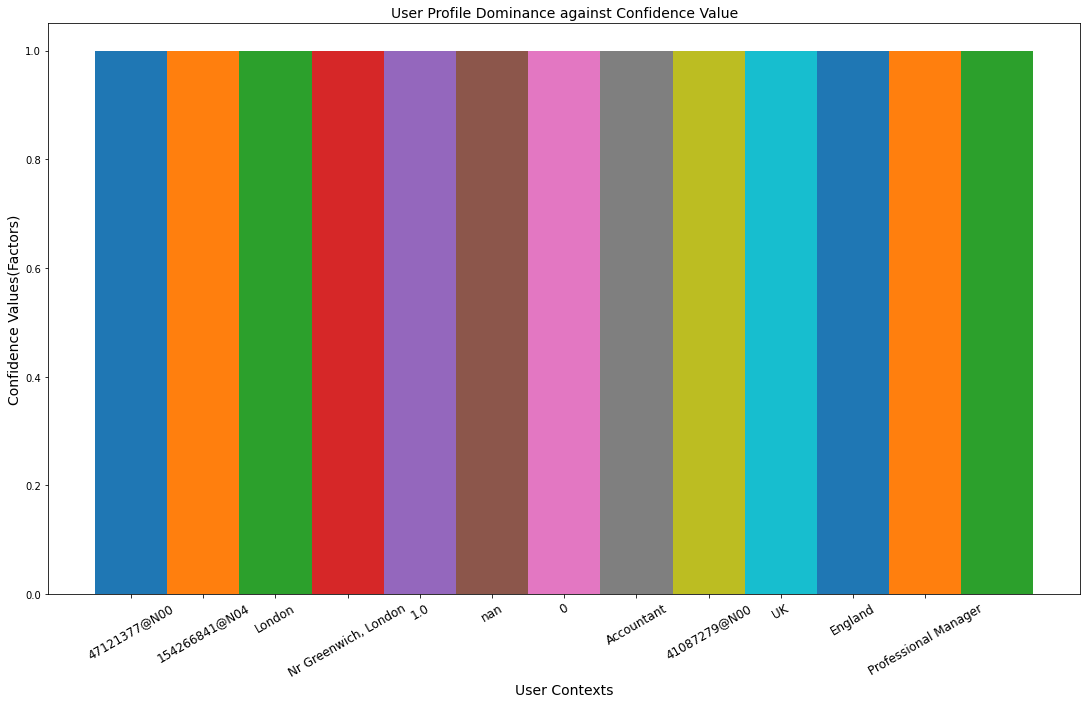

In [ ]:
import plotly.plotly as py
import plotly.tools as tls

from matplotlib import pylab
names = list(D.keys())
values = list(D.values())
width = 1 
for i in range(len(D)):
    
    pylab.bar(i,values[i],width,tick_label=names[i])
#     plt.bar(1,values[1],tick_label=names[1])
#     plt.bar(2,values[2],tick_label=names[2])
    plt.xticks(range(0,i),names,fontsize=12,rotation=30)
#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylabel('Confidence Values(Factors)',fontsize=14)
plt.xlabel('User Contexts',fontsize=14)
plt.title('User Profile Dominance against Confidence Value',fontsize=14)
plt.savefig('Confidence.png')
plt.show()

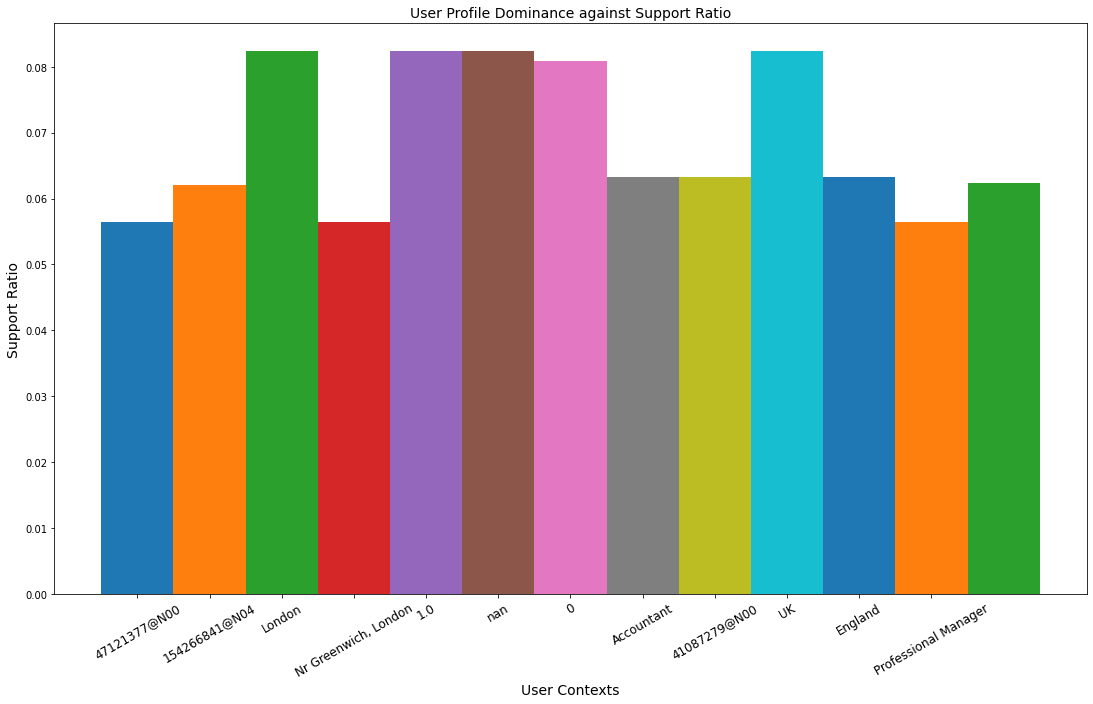

In [ ]:
import plotly.plotly as py
import plotly.tools as tls

from matplotlib import pylab
names = list(D.keys())
values = list(D.values())
width = 1 
for i in range(len(D)):
    
    pylab.bar(i,values[i],width,tick_label=names[i])
#     plt.bar(1,values[1],tick_label=names[1])
#     plt.bar(2,values[2],tick_label=names[2])
    plt.xticks(range(0,i),names,fontsize=12,rotation=30)
#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylabel('Support Ratio',fontsize=14)
plt.xlabel('User Contexts',fontsize=14)
plt.title('User Profile Dominance against Support Ratio',fontsize=14)
plt.savefig('association-2.png')
plt.show()

In [ ]:
#Significant parameters[u_city, u_country,faves, occupation, owner ]

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Neural-CARS/london_20k.csv') 

In [ ]:
proven= df[['u_country','faves','u_city','occupation','owner']]

In [ ]:
proven.head()

,u_country,faves,u_city,occupation,owner
0,USA,0,30307,Producer/DJ,78191777@N00
1,England,1,London,Accountant,41087279@N00
2,England,0,London,Accountant,41087279@N00
3,NaN,5,NaN,NaN,30625665@N00
4,England,1,London,Accountant,41087279@N00


In [ ]:
missing_nan = proven.isna().sum()

In [ ]:
print('TOTAL MISSINGS:', missing_nan, sep='\n')


TOTAL MISSINGS:
u_country      8320
faves             0
u_city         8483
occupation    10437
owner             0
dtype: int64


In [ ]:
# Remove missing values
data = proven.dropna(subset=['u_country','faves','u_city','occupation','owner'])
new_size = len(data.index)
print(f'{"-"*50}\n{proven.shape[0]-new_size} empty rows are removed.')

--------------------------------------------------
11529 empty rows are removed.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8471 entries, 0 to 19996
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   u_country   8471 non-null   object
 1   faves       8471 non-null   int64 
 2   u_city      8471 non-null   object
 3   occupation  8471 non-null   object
 4   owner       8471 non-null   object
dtypes: int64(1), object(4)
memory usage: 397.1+ KB


In [ ]:
data['u_city'],_=pd.factorize(data['u_city'])
data['u_country'],_=pd.factorize(data['u_country'])
data['occupation'],_=pd.factorize(data['occupation'])
data['owner'],_=pd.factorize(data['owner'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
data.head()

,u_country,faves,u_city,occupation,owner
0,0,0,0,0,0
1,1,1,1,1,1
2,1,0,1,1,1
4,1,1,1,1,1
6,1,3,1,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
context=scale.fit_transform(data)


In [ ]:
Y=context[:,1]

In [ ]:
X=context[:,[0,2,3,4]]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=30, learning_rate=0.1)

In [ ]:
gbr.fit(Xtrain,Ytrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
favourate_rates = gbr.predict(Xtest)
mse = mean_squared_error(Ytest, favourate_rates)
rmse = np.sqrt(mse)
rmse

0.5732195314767581

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
#calculate MAE
mae(Ytest, favourate_rates)

0.21629408121605392

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
import math, time
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
# model.add(Dense(500, input_dim=4, activation= "relu"))
# model.add(Dense(100, activation= "relu"))
# model.add(Dense(50, activation= "relu"))
# model.add(Dense(1))

In [ ]:
model.add(Dense(15, input_dim=4, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
optimizer = Adam(lr=0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse','mape'])

In [ ]:
history = model.fit(Xtrain,
                    Ytrain,
                    batch_size=22,
                    epochs=100,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/100
278/278 [==============================] - 4s 5ms/step - loss: 1.1400 - mse: 1.1400 - mape: 116.7243 - val_loss: 0.6091 - val_mse: 0.6091 - val_mape: 129.8320
Epoch 2/100
278/278 [==============================] - 1s 4ms/step - loss: 1.1023 - mse: 1.1023 - mape: 128.4837 - val_loss: 0.6049 - val_mse: 0.6049 - val_mape: 131.7150
Epoch 3/100
278/278 [==============================] - 1s 4ms/step - loss: 1.0619 - mse: 1.0619 - mape: 127.3839 - val_loss: 0.6072 - val_mse: 0.6072 - val_mape: 136.3537
Epoch 4/100
278/278 [==============================] - 1s 4ms/step - loss: 1.0007 - mse: 1.0007 - mape: 130.2100 - val_loss: 0.6169 - val_mse: 0.6169 - val_mape: 149.7574
Epoch 5/100
278/278 [==============================] - 1s 4ms/step - loss: 0.9165 - mse: 0.9165 - mape: 136.3674 - val_loss: 0.6145 - val_mse: 0.6145 - val_mape: 129.5906
Epoch 6/100
278/278 [==============================] - 1s 4ms/step - loss: 0.8181 - mse: 0.8181 - mape: 134.4903 - val_loss: 0.6361 - val_mse: 0.

In [ ]:
pred_train= model.predict(Xtrain)
print(np.sqrt(mean_squared_error(Ytrain,pred_train)))

pred= model.predict(Xtest)
print(np.sqrt(mean_squared_error(Ytest,pred))) 

0.7382232436973167
0.610319118762155


In [ ]:
mae(Ytest, pred)

0.26318867434211485

In [ ]:
def plot_loss(history):
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

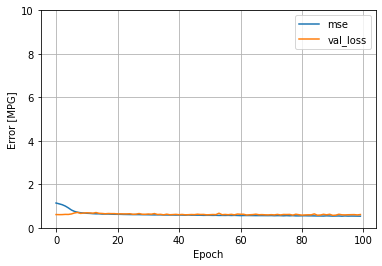

In [ ]:
plot_loss(history)

In [ ]:
data=df[['gender','tags','faves','u_city','lat','lon']]

In [ ]:
data.head()

,gender,tags,faves,u_city,lat,lon
0,1.0,"clapham, london, england, ukgarage, dubstep, e...",0,30307,51.465163,-0.129085
1,1.0,"chyna, whyne, from, jamaica, live, charlie, wr...",1,London,51.527672,-0.083648
2,1.0,"flirt, 69, birthday, party, charlie, wrights, ...",0,London,51.527672,-0.083648
3,1.0,"bank, ex, cash, point, atm, brick, stone, lond...",5,NaN,51.513042,-0.089221
4,1.0,"ray, estaire, jazz, ensemble, the, dominant, 7...",1,London,51.527672,-0.083648


In [ ]:
# Find total missing values
data = df[['gender','tags','faves','u_city','lat','lon']]
missing_nan = data.isna().sum()

print('TOTAL MISSINGS:', missing_nan, sep='\n')

# Remove missing values
data = data.dropna(subset=['lat','lon','gender','tags','u_city'])
new_size = len(data.index)
print(f'{"-"*50}\n{df.shape[0]-new_size} empty rows are removed.')

TOTAL MISSINGS:
gender      14
tags      4905
faves        0
u_city    8483
lat          0
lon          0
dtype: int64
--------------------------------------------------
11302 empty rows are removed.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8698 entries, 0 to 19996
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  8698 non-null   float64
 1   tags    8698 non-null   object 
 2   faves   8698 non-null   int64  
 3   u_city  8698 non-null   object 
 4   lat     8698 non-null   float64
 5   lon     8698 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 475.7+ KB


In [ ]:
data.head()

,gender,tags,faves,u_city,lat,lon
0,1.0,"clapham, london, england, ukgarage, dubstep, e...",0,30307,51.465163,-0.129085
1,1.0,"chyna, whyne, from, jamaica, live, charlie, wr...",1,London,51.527672,-0.083648
2,1.0,"flirt, 69, birthday, party, charlie, wrights, ...",0,London,51.527672,-0.083648
4,1.0,"ray, estaire, jazz, ensemble, the, dominant, 7...",1,London,51.527672,-0.083648
6,1.0,"zimbabwe, achievers, awards, 2014, london",3,London,51.502698,-0.188376


In [ ]:
data=data.drop('tags',axis=1)

In [ ]:
data.head()

,gender,faves,u_city,lat,lon
0,1.0,0,30307,51.465163,-0.129085
1,1.0,1,London,51.527672,-0.083648
2,1.0,0,London,51.527672,-0.083648
4,1.0,1,London,51.527672,-0.083648
6,1.0,3,London,51.502698,-0.188376


In [ ]:
data['u_city'],_=pd.factorize(data['u_city'])

In [ ]:
data.head()

,gender,faves,u_city,lat,lon
0,1.0,0,0,51.465163,-0.129085
1,1.0,1,1,51.527672,-0.083648
2,1.0,0,1,51.527672,-0.083648
4,1.0,1,1,51.527672,-0.083648
6,1.0,3,1,51.502698,-0.188376


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
# scaled=scale.fit(data)

In [ ]:
context=scale.fit_transform(data)

In [ ]:
context[:3,:]

array([[-0.40003139, -0.16370092, -0.74036046, -1.02722585,  0.15746715],
       [-0.40003139, -0.13981047, -0.7275011 ,  0.58293615,  0.55902988],
       [-0.40003139, -0.16370092, -0.7275011 ,  0.58293615,  0.55902988]])

In [ ]:
Y=context[:,1]

In [ ]:
X=context[:,[0,2,3,4]]


In [ ]:
X[:3,:]

array([[-0.40003139, -0.74036046, -1.02722585,  0.15746715],
       [-0.40003139, -0.7275011 ,  0.58293615,  0.55902988],
       [-0.40003139, -0.7275011 ,  0.58293615,  0.55902988]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
Xtrain.shape

(6958, 4)

In [ ]:
Ytrain.shape

(6958,)

In [ ]:
Xtrain.ndim

2

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=30, learning_rate=0.1)

In [ ]:
gbr.fit(Xtrain,Ytrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
favourate_rates = gbr.predict(Xtest)
mse = mean_squared_error(Ytest, favourate_rates)
rmse = np.sqrt(mse)
rmse

0.6187512286411968

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
#calculate MAE
mae(Ytest, favourate_rates)

0.19996346544126328

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
import math, time
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
# model.add(Dense(500, input_dim=4, activation= "relu"))
# model.add(Dense(100, activation= "relu"))
# model.add(Dense(50, activation= "relu"))
# model.add(Dense(1))

In [ ]:
model.add(Dense(15, input_dim=4, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# model.add(Dense(13, input_dim=4, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1, kernel_initializer='normal'))
# 	# Compile model

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
optimizer = Adam(lr=0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse','mape'])

In [ ]:
history = model.fit(Xtrain,
                    Ytrain,
                    batch_size=22,
                    epochs=100,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/100
285/285 [==============================] - 4s 5ms/step - loss: 1.2176 - mse: 1.2176 - mape: 107.7687 - val_loss: 0.3317 - val_mse: 0.3317 - val_mape: 114.8525
Epoch 2/100
285/285 [==============================] - 1s 4ms/step - loss: 1.2134 - mse: 1.2134 - mape: 115.4865 - val_loss: 0.3331 - val_mse: 0.3331 - val_mape: 135.4332
Epoch 3/100
285/285 [==============================] - 1s 4ms/step - loss: 1.2115 - mse: 1.2115 - mape: 143.1956 - val_loss: 0.3320 - val_mse: 0.3320 - val_mape: 129.1316
Epoch 4/100
285/285 [==============================] - 1s 4ms/step - loss: 1.2090 - mse: 1.2090 - mape: 139.6983 - val_loss: 0.3318 - val_mse: 0.3318 - val_mape: 123.7607
Epoch 5/100
285/285 [==============================] - 1s 4ms/step - loss: 1.2084 - mse: 1.2084 - mape: 133.5468 - val_loss: 0.3333 - val_mse: 0.3333 - val_mape: 141.0694
Epoch 6/100
285/285 [==============================] - 1s 4ms/step - loss: 1.2068 - mse: 1.2068 - mape: 138.6316 - val_loss: 0.3341 - val_mse: 0.

In [ ]:
pred_train= model.predict(Xtrain)
print(np.sqrt(mean_squared_error(Ytrain,pred_train)))

pred= model.predict(Xtest)
print(np.sqrt(mean_squared_error(Ytest,pred))) 

1.0191714021078249
0.6298443058407657


In [ ]:
mae(Ytest, pred)

0.21559794523337508

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
plot_loss(history)

In [ ]:
### General Findings from this Lab
# The approach of using any contextual parameters was giving better predictive results than the contexual parameters which were selected by
# the apriori algorithm(It was used to pick optimal parameters which can be used as independent variables)
# Conclusion - Picking any 5 optimal contextual parameters in CARS datasets to predict user preferences doesn't add any value to the 
# predictive models

In [ ]:
###### Possible Way Forward
# 1. Deduce contemporary contextual parameters that make a user like or dislike an item
# 2. Implement CARS for self-actualisation which derives these four lists
# "Things we think you will hate"
# "Things you will be among the first to try"
# "Things we are not sure about"
#  "Things that are controversial"
# 3. Create a hybrid of 1 and 2
# 4. Look for a domain to implement CARS, either IOT, Health, agriculture, Nutrition, earth observation, climate change etc 
